# **5. KNN**

Se selccionan las variables explicativas y la respuesta.

In [1]:

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import math
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, roc_auc_score, classification_report
)

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\diabetic_data_limpio.csv")

In [3]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"No": 0, "Yes": 1}) 

Se separan el conjunto de entrenamiento y test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [5]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [16]:
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo="Modelo"):
    """Evalúa un modelo y grafica sus métricas principales"""
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    print(f"\n🔹 {nombre_modelo}")
    print(f"Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")
    if auc:
        print(f"AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred))

    # Curva ROC
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Curva ROC - {nombre_modelo}")
        plt.legend()
        plt.show()

    return {
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AUC": auc
    }

## 5. KNN sin usar tecnicas de optimizacion

In [17]:
resultados_knn = []


start = time.time()
knn_std = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])
knn_std.fit(X_train, y_train)
y_pred_std = knn_std.predict(X_test)
end = time.time()
metrics_std = {
    "Modelo": "KNN - Benchmark",
    "Accuracy": accuracy_score(y_test, y_pred_std),
    "Precision": precision_score(y_test, y_pred_std),
    "Recall": recall_score(y_test, y_pred_std),
    "F1": f1_score(y_test, y_pred_std),
    "Tiempo (s)": round(end - start, 3)
}
resultados_knn.append(metrics_std)

## **5.1.1 KNN usando tecnicas de optimizacion**

In [18]:
start = time.time()
knn_kd = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree", n_jobs=-1))
])
knn_kd.fit(X_train, y_train)
y_pred_kd = knn_kd.predict(X_test)
end = time.time()
metrics_kd = {
    "Modelo": "KNN - KDTree",
    "Accuracy": accuracy_score(y_test, y_pred_kd),
    "Precision": precision_score(y_test, y_pred_kd),
    "Recall": recall_score(y_test, y_pred_kd),
    "F1": f1_score(y_test, y_pred_kd),
    "Tiempo (s)": round(end - start, 3)
}
resultados_knn.append(metrics_kd)

## 4

In [19]:
start = time.time()
knn_ball = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5, algorithm="ball_tree", n_jobs=-1))
])
knn_ball.fit(X_train, y_train)
y_pred_ball = knn_ball.predict(X_test)
end = time.time()
metrics_ball = {
    "Modelo": "KNN - BallTree",
    "Accuracy": accuracy_score(y_test, y_pred_ball),
    "Precision": precision_score(y_test, y_pred_ball),
    "Recall": recall_score(y_test, y_pred_ball),
    "F1": f1_score(y_test, y_pred_ball),
    "Tiempo (s)": round(end - start, 3)
}
resultados_knn.append(metrics_ball)

In [20]:
try:
    import faiss

    start = time.time()
    X_train_proc = preprocessor.fit_transform(X_train)
    X_test_proc = preprocessor.transform(X_test)

    d = X_train_proc.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(np.array(X_train_proc, dtype=np.float32))

    k = 5
    distances, indices = index.search(np.array(X_test_proc, dtype=np.float32), k)

    y_pred_faiss = []
    for idxs in indices:
        vecinos = y_train.iloc[idxs]
        voto = int(vecinos.mean() >= 0.5)
        y_pred_faiss.append(voto)

    end = time.time()
    metrics_faiss = {
        "Modelo": "KNN - FAISS",
        "Accuracy": accuracy_score(y_test, y_pred_faiss),
        "Precision": precision_score(y_test, y_pred_faiss),
        "Recall": recall_score(y_test, y_pred_faiss),
        "F1": f1_score(y_test, y_pred_faiss),
        "Tiempo (s)": round(end - start, 3)
    }
    resultados_knn.append(metrics_faiss)

except ImportError:
    print("⚠️ FAISS no está instalado. Ejecuta: pip install faiss-cpu o faiss-gpu")

            Modelo  Accuracy  Precision    Recall        F1  Tiempo (s)
0     KNN - KDTree  0.582686   0.551938  0.502398  0.526004      76.405
1  KNN - Benchmark  0.582244   0.551309  0.502825  0.525952       2.240
2   KNN - BallTree  0.582244   0.551309  0.502825  0.525952       2.360
3      KNN - FAISS  0.582244   0.551321  0.502718  0.525899       6.327


C:\Users\taran\AppData\Local\Temp\ipykernel_1372\3111315499.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="F1", data=tabla_resultados, palette="Reds")


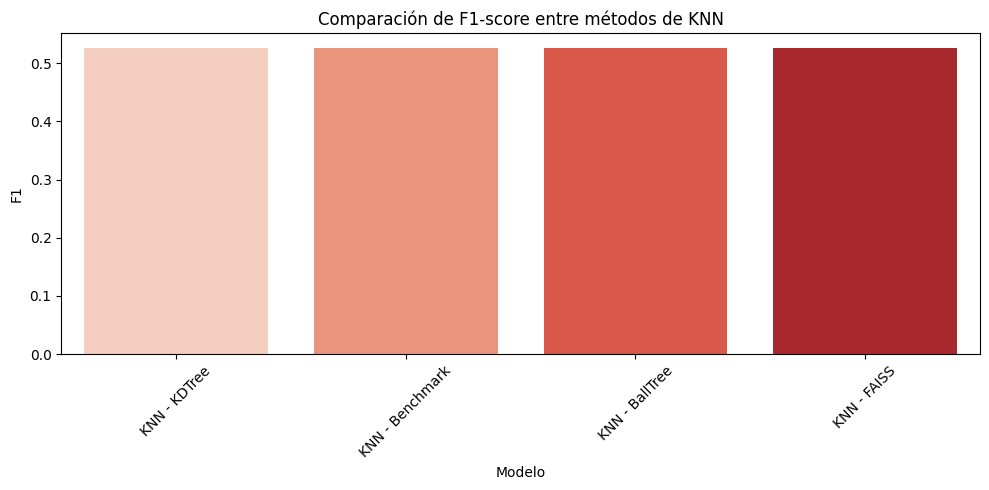

C:\Users\taran\AppData\Local\Temp\ipykernel_1372\3111315499.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Tiempo (s)", data=tabla_resultados, palette="Reds")


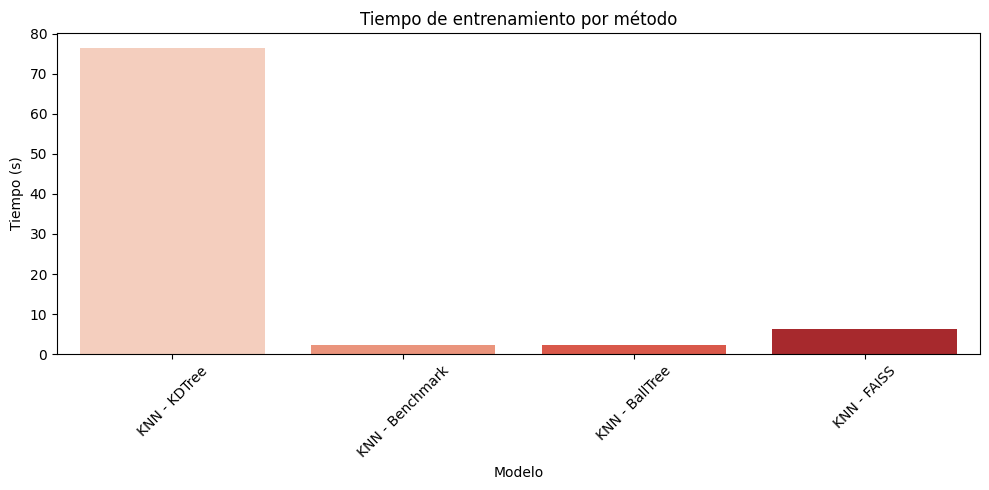

In [22]:
tabla_resultados = pd.DataFrame(resultados_knn).sort_values("F1", ascending=False).reset_index(drop=True)
print(tabla_resultados)

#  Visualización comparativa
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="F1", data=tabla_resultados, palette="Reds")
plt.title("Comparación de F1-score entre métodos de KNN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="Tiempo (s)", data=tabla_resultados, palette="Reds")
plt.title("Tiempo de entrenamiento por método")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()